In [1]:
import pandas as pd

In [2]:

# Функции для расчета метрик ARPU и Cumulative ARPU
def calculate_arpu(revenue, active_users):
    """Вычисление ARPU.
    
    Args:
        revenue (float): Общий доход.
        active_users (int): Количество активных пользователей.
    
    Returns:
        float: ARPU.
    """
    if active_users == 0:
        raise ValueError("Количество активных пользователей не может быть равно нулю.")
    return revenue / active_users

def calculate_cumulative_arpu(data):
    """Вычисление кумулятивного ARPU.
    
    Args:
        data (pd.DataFrame): Данные с доходом и активными пользователями.
    
    Returns:
        float: Кумулятивный ARPU.
    """
    total_revenue = data["revenue"].sum()
    total_users = data["active_users"].sum()
    return total_revenue / total_users

In [3]:
# Загрузка данных
data_path = "../data/arpu_data.csv"
data = pd.read_csv(data_path)

# Расчет ARPU для каждого дня
data["ARPU"] = data.apply(lambda row: calculate_arpu(row["revenue"], row["active_users"]), axis=1)

# Расчет кумулятивного ARPU
cumulative_arpu = calculate_cumulative_arpu(data)

# # Вывод результатов
# print(data)
# print(f"Cumulative ARPU: {cumulative_arpu:.2f}")

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

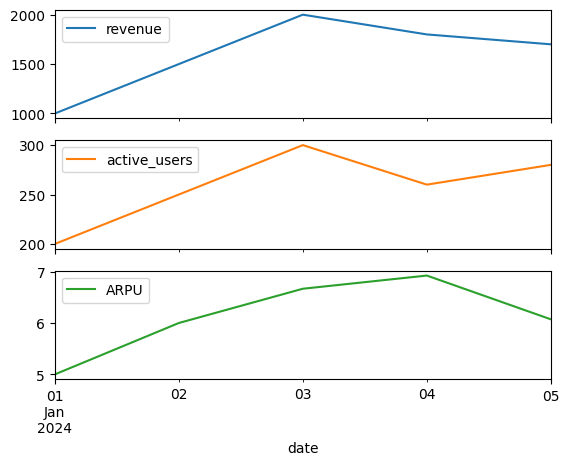

In [10]:
data.index = pd.to_datetime(data['date'])
data.iloc[:, 1:].plot(subplots=True)